# Project Abtract:

The project focuses on analyzing residential property prices to gain insights into the factors influencing the housing market. By examining various variables such as property characteristics, location, market trends, and economic indicators, this project aims to provide a comprehensive understanding of the factors driving home prices and identify key trends and patterns.

The project utilizes a dataset containing information on residential properties, including features such as square footage, number of bedrooms and bathrooms, location attributes (e.g., neighborhood, proximity to amenities), and corresponding sale prices. By analyzing these variables, the project seeks to uncover correlations and trends that can help stakeholders understand the dynamics of the housing market and make informed decisions regarding real estate investments, pricing strategies, and policy development.

Through exploratory data analysis and statistical modeling techniques, the project aims to identify the key factors influencing home prices. This includes assessing the impact of property characteristics (e.g., size, amenities), location factors (e.g., proximity to schools, transportation), and market trends (e.g., supply and demand, interest rates) on property values. Additionally, the project explores the relationships between economic indicators (e.g., GDP growth, employment rates) and home prices to understand the broader macroeconomic influences on the housing market.

The outcomes of this project have implications for real estate professionals, investors, policymakers, and prospective homeowners. Real estate professionals can utilize the findings to better understand market trends, advise clients, and develop effective pricing strategies. Investors can gain insights into factors that drive property value appreciation and identify lucrative investment opportunities. Policymakers can use the findings to inform housing policies, zoning regulations, and urban planning initiatives. Prospective homeowners can make more informed decisions regarding property purchases, taking into account factors that influence home prices and long-term value appreciation.


In [1]:


import numpy as np
import pandas as pd

import matplotlib.pyplot  as plt
import seaborn as sns
%matplotlib inline



**Loading Dataset**

In [2]:
dataset = pd.read_csv('Home_price_data.csv')
dataset.head(10)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
5,2014-05-02 00:00:00,490000.0,2.0,1.00,880,6380,1.0,0,0,3,880,0,1938,1994,522 NE 88th St,Seattle,WA 98115,USA
6,2014-05-02 00:00:00,335000.0,2.0,2.00,1350,2560,1.0,0,0,3,1350,0,1976,0,2616 174th Ave NE,Redmond,WA 98052,USA
7,2014-05-02 00:00:00,482000.0,4.0,2.50,2710,35868,2.0,0,0,3,2710,0,1989,0,23762 SE 253rd Pl,Maple Valley,WA 98038,USA
8,2014-05-02 00:00:00,452500.0,3.0,2.50,2430,88426,1.0,0,0,4,1570,860,1985,0,46611-46625 SE 129th St,North Bend,WA 98045,USA
9,2014-05-02 00:00:00,640000.0,4.0,2.00,1520,6200,1.5,0,0,3,1520,0,1945,2010,6811 55th Ave NE,Seattle,WA 98115,USA


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [4]:
dataset.shape

(4600, 18)

In [5]:
dataset.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


**Delete date column** Date column is irrelevant

In [6]:
dataset.drop(['date'], axis = 1, inplace = True)
dataset.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


**Checking how many different Countries are there**

In [7]:
dataset.country.value_counts()

country
USA    4600
Name: count, dtype: int64

Deleting the country column as all the records have the same country, hence irrelevant

In [8]:
dataset.drop(['country'], axis = 1, inplace = True)
dataset.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip
0,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133
1,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119
2,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042
3,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008
4,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052


Since we already have statezip, we can safely delete street and city.

In [9]:
dataset.drop(['street', 'city'], axis = 1, inplace = True)
dataset.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,statezip
0,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,WA 98133
1,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,WA 98119
2,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,WA 98042
3,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,WA 98008
4,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,WA 98052


**Checking for null values**

In [10]:
dataset.isnull().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
statezip         0
dtype: int64

*No null values present*

# General corellation analysis

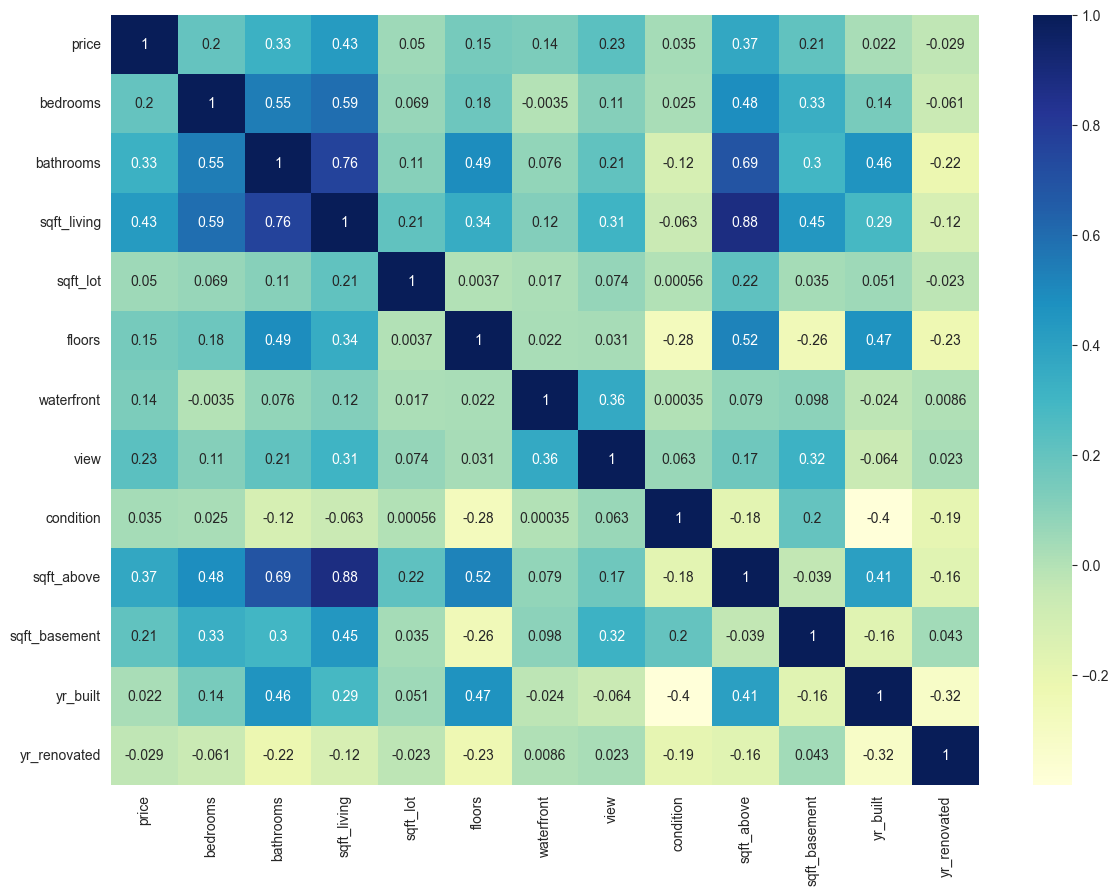

In [11]:
plt.figure(figsize=(14, 10))

cor = dataset.corr(numeric_only=True)
sns.heatmap(cor, annot=True, cmap="YlGnBu")
plt.show()


In [12]:
dataset['age_of_property'] = 2024 - dataset['yr_built']



In [13]:
dataset['price_per_sqft'] = dataset['price'] / dataset['sqft_living']


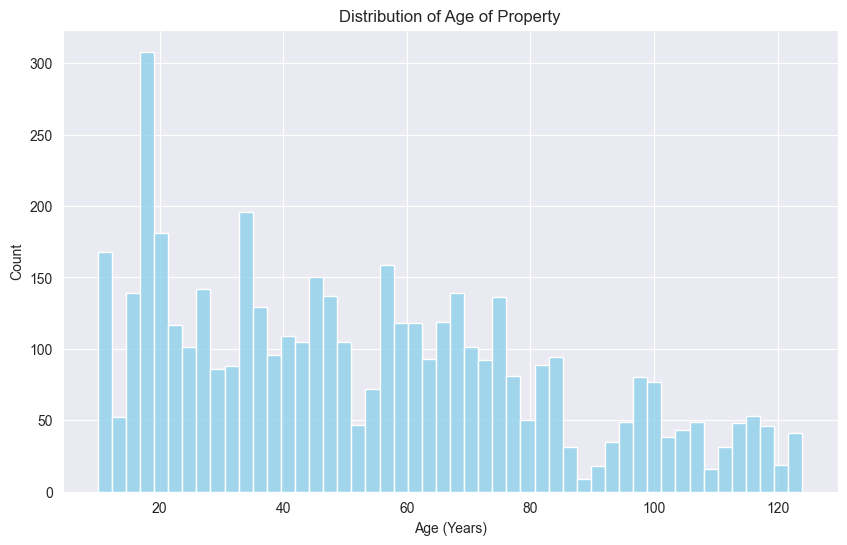

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.histplot(dataset['age_of_property'], bins=50, color='skyblue')
plt.title('Distribution of Age of Property')
plt.xlabel('Age (Years)')
plt.ylabel('Count')
plt.show()




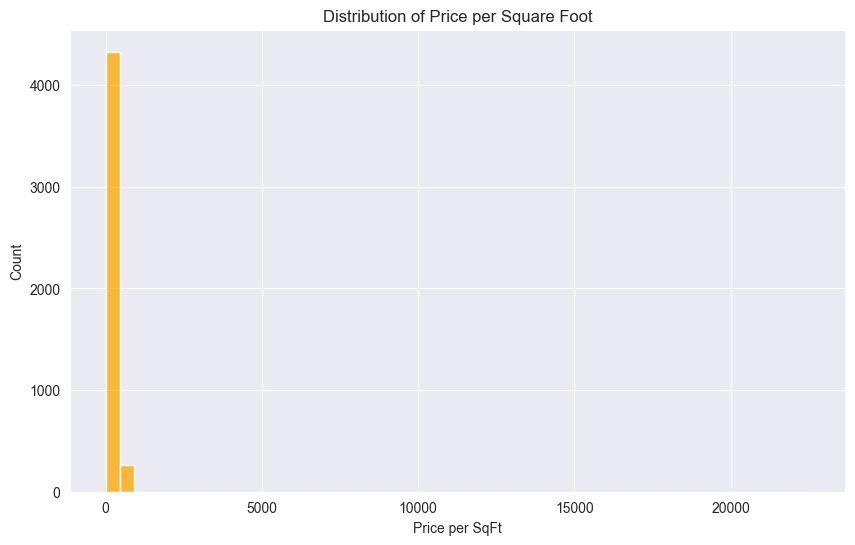

In [15]:
plt.figure(figsize=(10,6))
sns.histplot(dataset['price_per_sqft'], bins=50, color='orange')
plt.title('Distribution of Price per Square Foot')
plt.xlabel('Price per SqFt')
plt.ylabel('Count')
plt.show()

# Analysis on number of bedroom feature

corellation of price with no. of bedrooms

<Axes: xlabel='bedrooms', ylabel='price'>

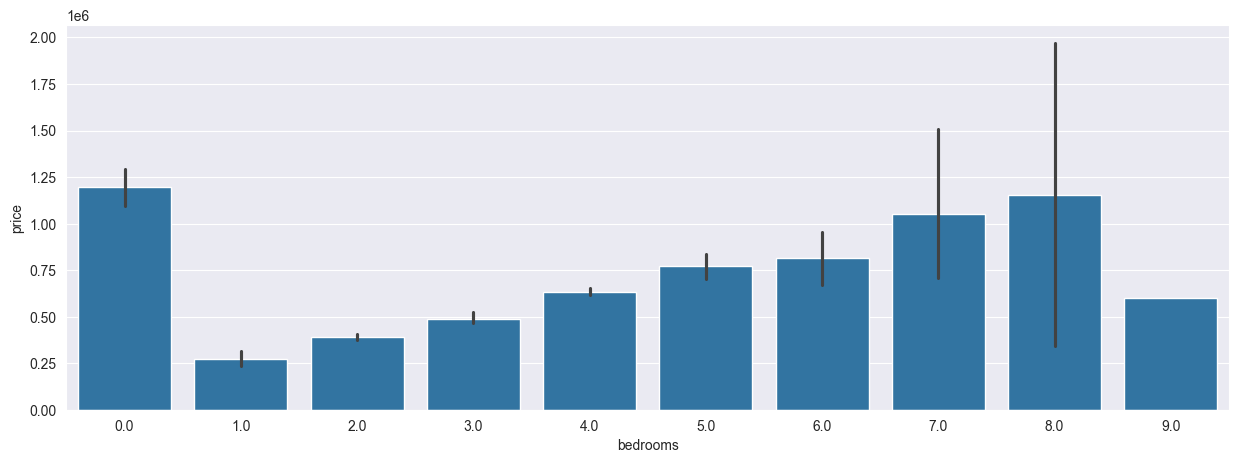

In [16]:
a4_dims = (15, 5)
fig, ax = plt.subplots(figsize=a4_dims)
sns.barplot(x = dataset.bedrooms, y = dataset.price)

*0 & 9 bedrooms are probably an outlier. Let's dive deeper*

Let's get the count  of respective no. of bedrooms

In [17]:
dataset.groupby('bedrooms').price.agg([len, min, max])

C:\Users\YASH\AppData\Local\Temp\ipykernel_10368\316901763.py:1: FutureWarning: The provided callable <built-in function min> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  dataset.groupby('bedrooms').price.agg([len, min, max])
C:\Users\YASH\AppData\Local\Temp\ipykernel_10368\316901763.py:1: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  dataset.groupby('bedrooms').price.agg([len, min, max])


,len,min,max
bedrooms,,,
0.0,2,1095000.0,1295648.0
1.0,38,0.0,540000.0
2.0,566,0.0,1695000.0
3.0,2032,0.0,26590000.0
4.0,1531,0.0,4489000.0
5.0,353,0.0,7062500.0
6.0,61,0.0,3100000.0
7.0,14,280000.0,3200000.0
8.0,2,340000.0,1970000.0


*Hence proved that 0 & 9 are outliers. Let's remove them*

In [18]:
df = dataset[(dataset.bedrooms > 0) & (dataset.bedrooms < 9)].copy()

In [19]:
df.shape

(4597, 16)

# Analysis on the zipcode feature

Checking for unique zip code

In [20]:
df.statezip.value_counts()

statezip
WA 98103    147
WA 98052    135
WA 98117    132
WA 98115    130
WA 98006    110
           ... 
WA 98047      6
WA 98288      3
WA 98050      2
WA 98354      2
WA 98068      1
Name: count, Length: 77, dtype: int64

*All the zip codes are of Washington. Let's do a correlation analysis of zip codes*

<Axes: xlabel='price', ylabel='statezip'>

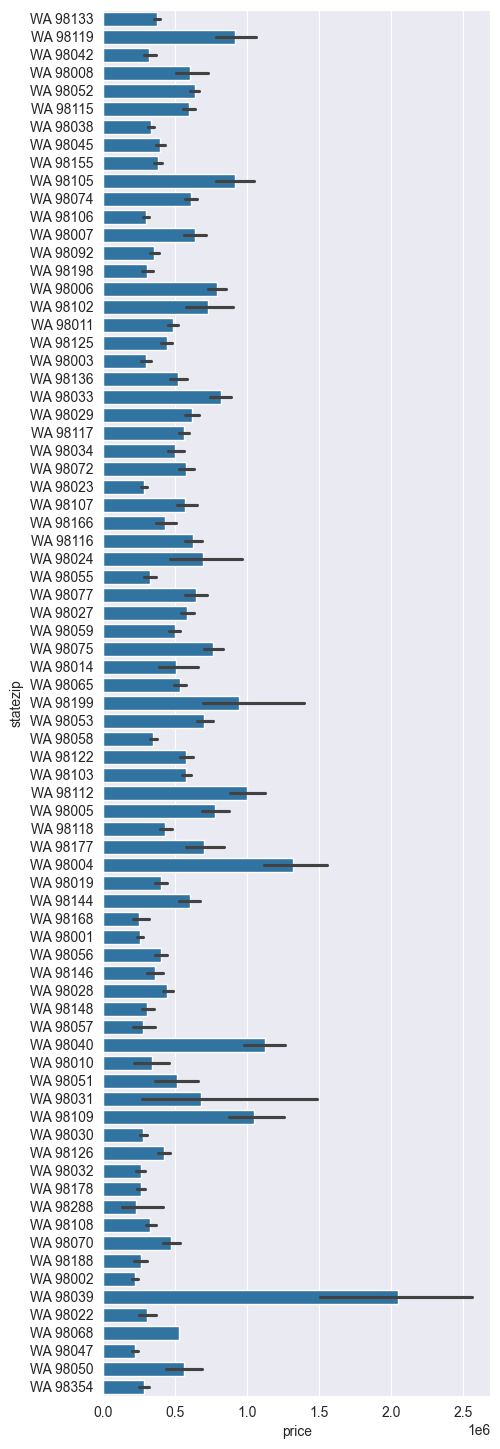

In [21]:
a4_dims = (5, 18)
fig, ax = plt.subplots(figsize=a4_dims)
sns.barplot(ax = ax, x = df.price, y = df.statezip)

Let's look at the distribution of price

C:\Users\YASH\AppData\Local\Temp\ipykernel_10368\3037842199.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a = df.price, bins = 1000, color = 'r', ax = ax)


<Axes: xlabel='price', ylabel='Density'>

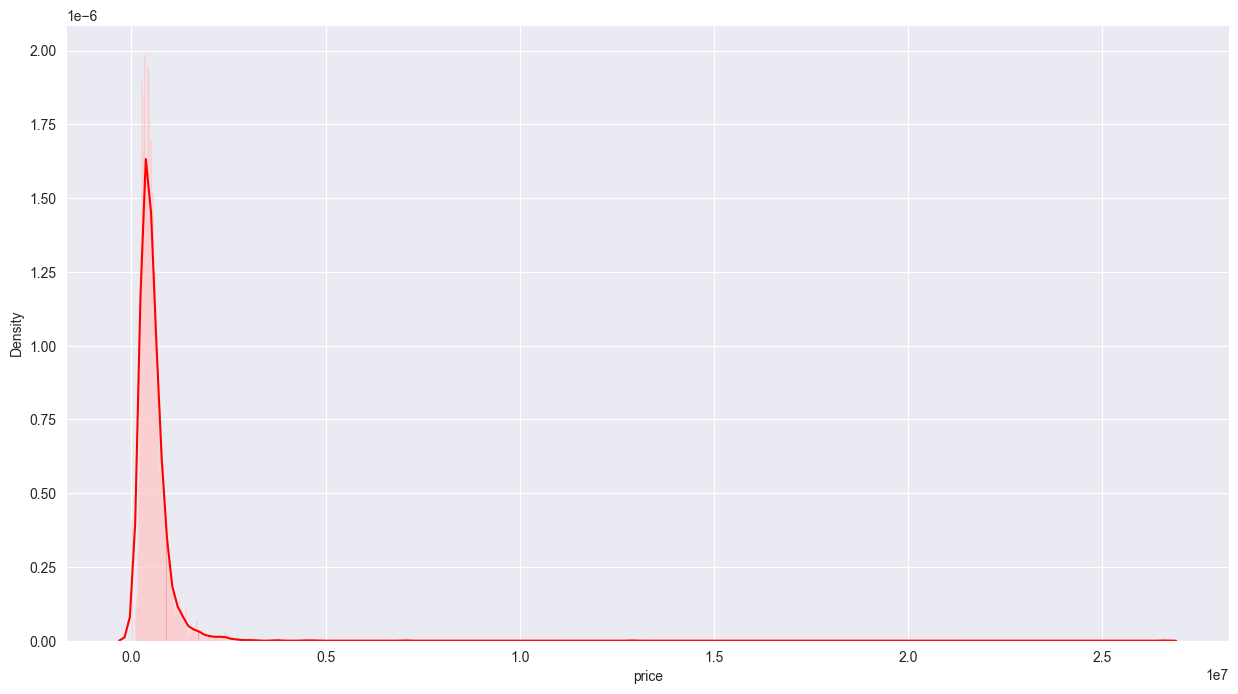

In [22]:
a4_dims = (15, 8)
fig, ax = plt.subplots(figsize=a4_dims)
sns.distplot(a = df.price, bins = 1000, color = 'r', ax = ax)

Groupby on price

In [23]:
df.price.agg([min, max])

C:\Users\YASH\AppData\Local\Temp\ipykernel_10368\2097143056.py:1: FutureWarning: The provided callable <built-in function min> is currently using Series.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  df.price.agg([min, max])
C:\Users\YASH\AppData\Local\Temp\ipykernel_10368\2097143056.py:1: FutureWarning: The provided callable <built-in function max> is currently using Series.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  df.price.agg([min, max])


min           0.0
max    26590000.0
Name: price, dtype: float64

**How many instances are there with price = 0?**

In [24]:
len(df[(df.price == 0)])

49

*need to set some price for these records*

# Analysis on bathroom feature w.r.t. price

<Axes: xlabel='bathrooms', ylabel='price'>

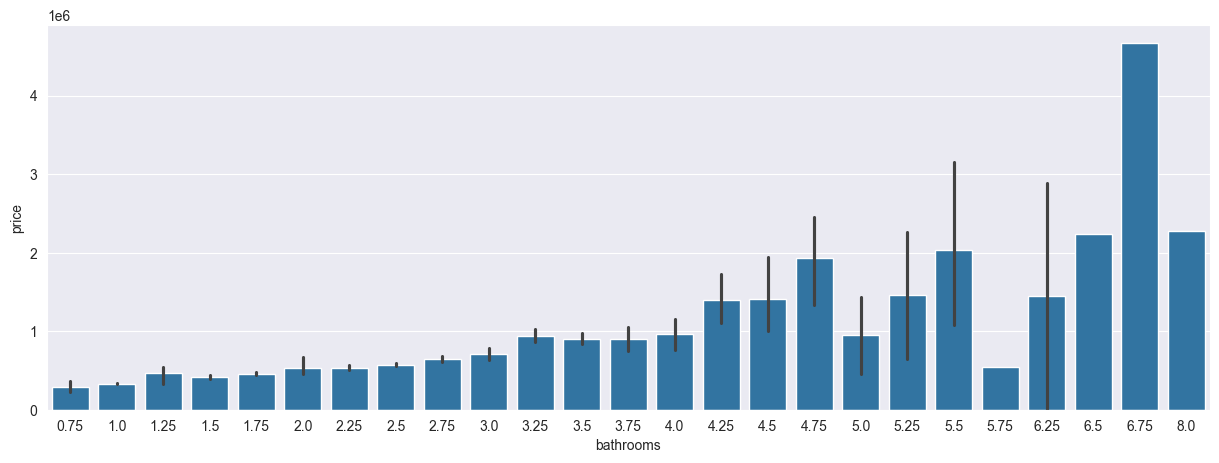

In [25]:
a4_dims = (15, 5)
fig, ax = plt.subplots(figsize=a4_dims)
sns.barplot(x = df.bathrooms, y = df.price)

# Analysis on all the instances whose price is 0

Getting all those instances

In [26]:
zero_price = df[(df.price == 0)].copy()
zero_price.shape

(49, 16)

In [27]:
zero_price.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,statezip,age_of_property,price_per_sqft
4354,0.0,3.0,1.75,1490,10125,1.0,0,0,4,1490,0,1962,0,WA 98001,62,0.0
4356,0.0,4.0,2.75,2600,5390,1.0,0,0,4,1300,1300,1960,2001,WA 98199,64,0.0
4357,0.0,6.0,2.75,3200,9200,1.0,0,2,4,1600,1600,1953,1983,WA 98146,71,0.0
4358,0.0,5.0,3.50,3480,36615,2.0,0,0,4,2490,990,1983,0,WA 98075,41,0.0
4361,0.0,5.0,1.50,1500,7112,1.0,0,0,5,760,740,1920,0,WA 98166,104,0.0


Let's get the unique value of the most important features

C:\Users\YASH\AppData\Local\Temp\ipykernel_10368\4117077209.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(zero_price.sqft_living)


<Axes: xlabel='sqft_living', ylabel='Density'>

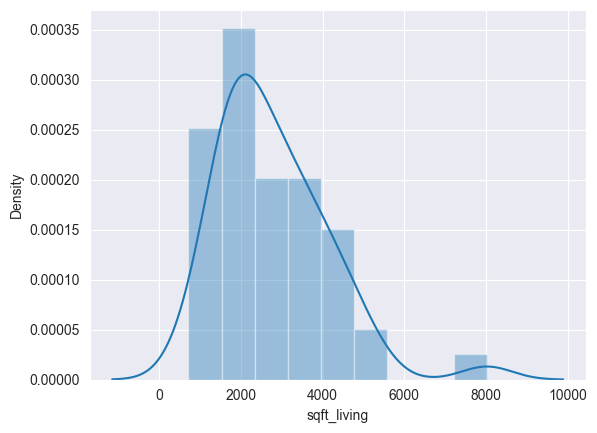

In [28]:
sns.distplot(zero_price.sqft_living)

*Most of the 0 price houses are in the range 1000 - 5000 sqft*

Let's find more correlation between the 0 price houses

**We are going to use common ranges from the above table to get similar records from the original dataset and non-zero price to set the values of 0 price instances**

In [29]:
sim_from_ori = df[(df.bedrooms == 4) & (df.bathrooms > 1) & (df.bathrooms < 4) & (df.sqft_living > 2500) & (df.sqft_living < 3000) & (df.floors < 3) & (df.yr_built < 1970)].copy()

In [30]:
sim_from_ori.shape

(79, 16)

In [31]:
sim_from_ori.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,statezip,age_of_property,price_per_sqft
11,1400000.0,4.0,2.50,2920,4000,1.5,0,0,5,1910,1010,1909,1988,WA 98105,115,479.452055
172,407000.0,4.0,2.25,2810,23400,1.0,0,1,3,1710,1100,1958,2004,WA 98198,66,144.839858
207,360000.0,4.0,2.00,2680,18768,1.0,0,0,5,2680,0,1965,0,WA 98001,59,134.328358
257,749950.0,4.0,2.75,2600,6050,2.0,0,0,5,1960,640,1949,0,WA 98116,75,288.442308
261,581000.0,4.0,2.00,2510,13695,1.0,0,0,4,1280,1230,1961,2001,WA 98033,63,231.474104


Get the average price of these instances

In [32]:
sim_from_ori.price.mean()

735475.0370705189

Let's confirm this by comparing with the other house price of the same yr_built and having similar sq_ft

In [33]:
yr_sqft = df[(df.sqft_living > 2499) & (df.sqft_living < 2900)].copy()
yr_price_avg = yr_sqft.groupby('yr_built').price.agg('mean')

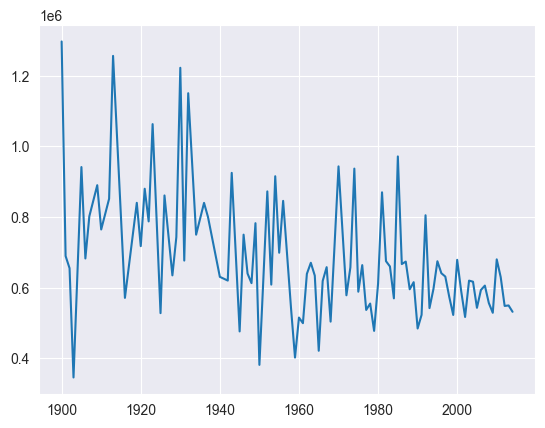

In [34]:
plt.plot(yr_price_avg)

*This confirms our assumption. The avg. pricing of such houses is between 600000 to 800000*

**Replacing all 0 price values with $730000**

In [35]:
df.price.replace(to_replace = 0, value = 735000, inplace = True)
len(df[(df.price == 0)])

C:\Users\YASH\AppData\Local\Temp\ipykernel_10368\2729997558.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.price.replace(to_replace = 0, value = 735000, inplace = True)


0

In [36]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,statezip,age_of_property,price_per_sqft
0,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,WA 98133,69,233.582090
1,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,WA 98119,103,653.150685
2,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,WA 98042,58,177.202073
3,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,WA 98008,61,210.000000
4,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,WA 98052,48,283.505155


# Feature reduction

Since sqft_living is the most important feature and sqft_living & sqft_above are highly corellated we are going  to remove the sqft_above feature.

In [37]:
df.drop(['sqft_above','sqft_lot','sqft_basement','waterfront','view','yr_renovated'], axis = 1, inplace = True)
df.shape

(4597, 10)

# Handling the index order
By removing some rows our original dataset index is changed. Let's fix it

In [38]:
df = df.reset_index()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4597 entries, 0 to 4596
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   index            4597 non-null   int64  
 1   price            4597 non-null   float64
 2   bedrooms         4597 non-null   float64
 3   bathrooms        4597 non-null   float64
 4   sqft_living      4597 non-null   int64  
 5   floors           4597 non-null   float64
 6   condition        4597 non-null   int64  
 7   yr_built         4597 non-null   int64  
 8   statezip         4597 non-null   object 
 9   age_of_property  4597 non-null   int64  
 10  price_per_sqft   4597 non-null   float64
dtypes: float64(5), int64(5), object(1)
memory usage: 395.2+ KB


# Handling categorical statezip feature

Performing label encoder

In [39]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [40]:
df['statezip_encoded'] = le.fit_transform(df.statezip)
df.head()

,index,price,bedrooms,bathrooms,sqft_living,floors,condition,yr_built,statezip,age_of_property,price_per_sqft,statezip_encoded
0,0,313000.0,3.0,1.50,1340,1.5,3,1955,WA 98133,69,233.582090,62
1,1,2384000.0,5.0,2.50,3650,2.0,5,1921,WA 98119,103,653.150685,58
2,2,342000.0,3.0,2.00,1930,1.0,4,1966,WA 98042,58,177.202073,26
3,3,420000.0,3.0,2.25,2000,1.0,4,1963,WA 98008,61,210.000000,7
4,4,550000.0,4.0,2.50,1940,1.0,4,1976,WA 98052,48,283.505155,31


Let's confirm our label encoding

In [41]:
df.statezip_encoded.value_counts()

statezip_encoded
47    147
31    135
56    132
54    130
5     110
     ... 
28      6
75      3
29      2
76      2
39      1
Name: count, Length: 77, dtype: int64

Drop the statezip field

In [42]:
df.drop(['statezip'], axis = 1, inplace = True)
df.head()

,index,price,bedrooms,bathrooms,sqft_living,floors,condition,yr_built,age_of_property,price_per_sqft,statezip_encoded
0,0,313000.0,3.0,1.50,1340,1.5,3,1955,69,233.582090,62
1,1,2384000.0,5.0,2.50,3650,2.0,5,1921,103,653.150685,58
2,2,342000.0,3.0,2.00,1930,1.0,4,1966,58,177.202073,26
3,3,420000.0,3.0,2.25,2000,1.0,4,1963,61,210.000000,7
4,4,550000.0,4.0,2.50,1940,1.0,4,1976,48,283.505155,31


**One hot encoding**

In [43]:
from sklearn.preprocessing import OneHotEncoder
ohc = OneHotEncoder()

In [44]:
ohc_df = pd.DataFrame(ohc.fit_transform(df[['statezip_encoded']]).toarray())
# ohc_df = ohc_df.astype(int)
ohc_df.head()

,0,1,2,3,4,5,6,7,8,9,...,67,68,69,70,71,72,73,74,75,76
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Mergeing ohc_df into the main dataset

In [45]:
df = df.join(ohc_df)
df.head()

,index,price,bedrooms,bathrooms,sqft_living,floors,condition,yr_built,age_of_property,price_per_sqft,...,67,68,69,70,71,72,73,74,75,76
0,0,313000.0,3.0,1.50,1340,1.5,3,1955,69,233.582090,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,2384000.0,5.0,2.50,3650,2.0,5,1921,103,653.150685,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,342000.0,3.0,2.00,1930,1.0,4,1966,58,177.202073,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,420000.0,3.0,2.25,2000,1.0,4,1963,61,210.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,550000.0,4.0,2.50,1940,1.0,4,1976,48,283.505155,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [46]:
df.tail()

,index,price,bedrooms,bathrooms,sqft_living,floors,condition,yr_built,age_of_property,price_per_sqft,...,67,68,69,70,71,72,73,74,75,76
4592,4595,308166.666667,3.0,1.75,1510,1.0,4,1954,70,204.083885,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4593,4596,534333.333333,3.0,2.50,1460,2.0,3,1983,41,365.981735,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4594,4597,416904.166667,3.0,2.50,3010,2.0,3,2009,15,138.506368,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4595,4598,203400.000000,4.0,2.00,2090,1.0,3,1974,50,97.320574,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4596,4599,220600.000000,3.0,2.50,1490,2.0,4,1990,34,148.053691,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Drop the statezip_encoded field

In [47]:
df.drop(['statezip_encoded'], axis = 1, inplace = True)

In [48]:
df.info

<bound method DataFrame.info of       index         price  bedrooms  bathrooms  sqft_living  floors  \
0         0  3.130000e+05       3.0       1.50         1340     1.5   
1         1  2.384000e+06       5.0       2.50         3650     2.0   
2         2  3.420000e+05       3.0       2.00         1930     1.0   
3         3  4.200000e+05       3.0       2.25         2000     1.0   
4         4  5.500000e+05       4.0       2.50         1940     1.0   
...     ...           ...       ...        ...          ...     ...   
4592   4595  3.081667e+05       3.0       1.75         1510     1.0   
4593   4596  5.343333e+05       3.0       2.50         1460     2.0   
4594   4597  4.169042e+05       3.0       2.50         3010     2.0   
4595   4598  2.034000e+05       4.0       2.00         2090     1.0   
4596   4599  2.206000e+05       3.0       2.50         1490     2.0   

      condition  yr_built  age_of_property  price_per_sqft  ...   67   68  \
0             3      1955             

# Splitting into train and test set

In [49]:
df.shape

(4597, 87)

In [50]:
X = df.iloc[:, 1:]
X.shape

(4597, 86)

In [51]:
y = df.price

Splitting dataset into train and remainder

In [52]:
from sklearn.model_selection import train_test_split
X_train, X_rem, y_train, y_rem = train_test_split(X, y, test_size=0.1, random_state=42)

In [53]:
X_train.shape

(4137, 86)

In [96]:
import joblib
joblib.dump(X_train.columns.tolist(), "columns.pkl")


['columns.pkl']

In [54]:
X_train.head(4)

,price,bedrooms,bathrooms,sqft_living,floors,condition,yr_built,age_of_property,price_per_sqft,0,...,67,68,69,70,71,72,73,74,75,76
2339,809950.0,4.0,2.50,3280,2.0,3,2001,23,246.935976,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1721,687000.0,4.0,3.25,4400,2.0,4,1993,31,156.136364,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1212,660000.0,3.0,2.50,2450,2.0,3,2010,14,269.387755,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4518,735000.0,4.0,1.00,1810,1.0,2,1959,65,0.000000,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [55]:
print(len(X_train) / len(df))

0.8999347400478573


Splitting remainder into validation and test set

In [56]:
X_val, X_test, y_val, y_test = train_test_split(X_rem, y_rem, test_size=0.5, random_state=42)
print(len(X_test) / len(y_rem))

0.5


Let's print the length of all the 3 splits

In [57]:
print(len(X_train))
print(len(X_val))
print(len(X_val))

4137
230
230


# Linear regression

In [58]:
import pandas as pd
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train.values, y_train)


LinearRegression()

Fitting the model

In [59]:
# from sklearn.metrics import mean_squared_error
# y_pred = lin_reg.predict(X_val)
# mse = mean_squared_error(y_pred, y_val)
# rmse = np.sqrt(mse)
# rmse
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X_train.columns = X_train.columns.astype(str)
X_val.columns = X_val.columns.astype(str)

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

y_pred = lin_reg.predict(X_val)
mse = mean_squared_error(y_pred, y_val)
rmse = np.sqrt(mse)
rmse


7.467175223400931e-10

In [60]:
y_val.head(10)

1073    175000.0
4524    950100.0
4434    309487.5
2572    427000.0
4310    375000.0
4017    665000.0
4241    759000.0
3139    425000.0
2283    325000.0
4200    679000.0
Name: price, dtype: float64

In [61]:
y_pred

array([  175000.        ,   950100.        ,   309487.5       ,
         427000.        ,   375000.        ,   665000.        ,
         759000.        ,   425000.        ,   325000.        ,
         679000.        ,   336000.        ,   630000.        ,
         492000.        ,   842500.        ,   264000.        ,
         383962.        ,   425000.        ,   925000.        ,
         235000.        ,   648360.        ,   580000.        ,
         615000.        ,   277000.        ,   225000.        ,
        2000000.        ,   565000.        ,   740000.        ,
         455000.        ,   385500.        ,   564000.        ,
         645000.        ,   583000.        ,   360000.        ,
         280000.        ,   285000.        ,   638000.        ,
         223000.        ,   239950.        ,   450000.        ,
         400000.        ,   375000.        ,   970000.        ,
         560000.        ,   825000.        ,   888550.        ,
         440000.        ,   199950.     

In [62]:


X_test.columns = X_test.columns.astype(str)

y_pred_test = lin_reg.predict(X_test)
mse = mean_squared_error(y_pred_test, y_test)
rmse = np.sqrt(mse)
rmse


1.268025827420458e-10

In [63]:
lin_reg.score(X_test, y_test)

1.0

In [98]:
import pickle
# Save the model
with open('model.pkl', 'wb') as f:
    pickle.dump(lin_reg, f)


In [64]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

ridge = Ridge()
param_grid = {
    'alpha': [0.01, 0.1, 1, 10, 100]
}

ridge_gs = GridSearchCV(ridge, param_grid, scoring='r2', cv=5)
ridge_gs.fit(X_train, y_train)

print("Best alpha:", ridge_gs.best_params_)
print("Train R²:", ridge_gs.best_estimator_.score(X_train, y_train))
print("Test R²:", ridge_gs.best_estimator_.score(X_test, y_test))


C:\Users\YASH\Desktop\Aerial\.venv\lib\site-packages\sklearn\linear_model\_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=1.59753e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\YASH\Desktop\Aerial\.venv\lib\site-packages\sklearn\linear_model\_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=2.20327e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\YASH\Desktop\Aerial\.venv\lib\site-packages\sklearn\linear_model\_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=1.76598e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\YASH\Desktop\Aerial\.venv\lib\site-packages\sklearn\linear_model\_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=1.6143e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\YASH\Desktop\Aerial\.venv\li

Best alpha: {'alpha': 0.01}
Train R²: 1.0
Test R²: 1.0


C:\Users\YASH\Desktop\Aerial\.venv\lib\site-packages\sklearn\linear_model\_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=1.39082e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


In [94]:
import pickle
# Save the model
with open('model.pkl', 'wb') as f:
    pickle.dump(ridge_gs.best_estimator_, f)


In [65]:
y_test

3454    450000.0
3857    300000.0
1818    174500.0
856     215000.0
1001    430000.0
          ...   
3760    392000.0
2596    650000.0
1839    327500.0
1835    320000.0
787     317000.0
Name: price, Length: 230, dtype: float64

In [66]:
y_pred_test

array([ 450000.      ,  300000.      ,  174500.      ,  215000.      ,
        430000.      ,  421000.      ,  280000.      ,  380000.      ,
        260000.      ,  453500.      ,  299950.      ,  326983.333333,
        440000.      ,  270000.      ,  869000.      ,  681716.      ,
        100000.      ,  331366.666667,  540000.      ,  280000.      ,
        399500.      ,  330000.      ,  399950.      ,  250600.      ,
        640000.      ,  530000.      ,  395000.      ,  615000.      ,
        840000.      ,  805000.      ,  381000.      ,  625000.      ,
        624800.      ,  870000.      ,  315000.      ,  375000.      ,
        810000.      ,  660000.      , 1080000.      ,  274950.      ,
        440000.      ,  510000.      ,  386380.      ,  510000.      ,
        282508.888889,  860000.      ,  443000.      ,  459500.      ,
        545000.      ,  623000.      ,  211000.      ,  590000.      ,
        735000.      ,  275000.      ,  747500.      ,  630000.      ,
      

In [67]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred_test)
print(f"R^2 Score: {r2:.2f}")

R^2 Score: 1.00


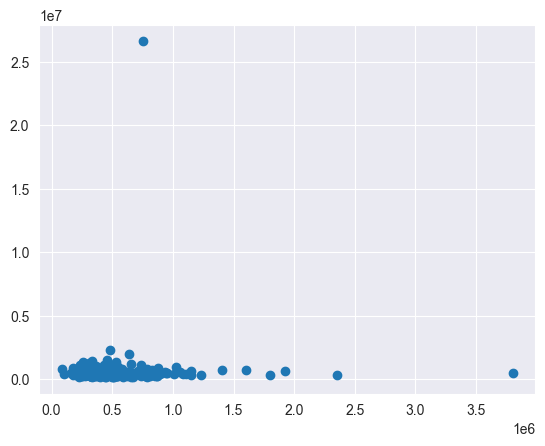

In [68]:
plt.scatter(y_test,y_pred)

# RandomForest



In [69]:
# current_year = pd.Timestamp.now().year
# df['age_of_property'] = current_year - df['yr_built']
# df.drop(['yr_built'], axis=1, inplace=True)
#
# print(df.columns)


In [70]:
# X = df.iloc[:, 1:]
# y = df.price
#
# X_train, X_rem, y_train, y_rem = train_test_split(X, y, test_size=0.1, random_state=42)
# X_val, X_test, y_val, y_test = train_test_split(X_rem, y_rem, test_size=0.5, random_state=42)

In [71]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [72]:
rf_model = RandomForestRegressor(
    n_estimators=100, random_state=42, n_jobs=-1
)
rf_model.fit(X_train, y_train)

RandomForestRegressor(n_jobs=-1, random_state=42)

In [73]:
rf_pred_val = rf_model.predict(X_val)
mse = mean_squared_error(y_val, rf_pred_val)
rf_rmse = np.sqrt(mse)
print(f"RMSE : {rf_rmse:.2f}")

RMSE : 1151262.95


In [74]:

r2 = r2_score(y_test, y_pred_test)
print(f"R^2 Score: {r2:.2f}")

R^2 Score: 1.00


# Hyperparameter tuning of RF

In [75]:
from sklearn.model_selection import GridSearchCV

In [76]:
param_grid_rf = {
    'n_estimators': [100, 200, 500],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [77]:
rf_gs = GridSearchCV(
    RandomForestRegressor(random_state=42),
    param_grid_rf,
    cv=3, scoring='neg_mean_squared_error',
    verbose=2, n_jobs=4
)
rf_gs.fit(X_train, y_train)


Fitting 3 folds for each of 81 candidates, totalling 243 fits


GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42), n_jobs=4,
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 500]},
             scoring='neg_mean_squared_error', verbose=2)

In [78]:
print("Best params for RF:", rf_gs.best_params_)


Best params for RF: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [79]:
y_pred_test_rf = rf_gs.best_estimator_.predict(X_test)
mse = mean_squared_error(y_test, y_pred_test_rf)
rf_rmse_test = np.sqrt(mse)
rf_rmse_test

4959.924014298815

In [80]:

r2 = r2_score(y_test, y_pred_test_rf)
print(f"R^2 Score: {r2:.2f}")

R^2 Score: 1.00


# XGBoost

In [81]:
import xgboost as xgb

In [82]:
xgb_model = xgb.XGBRegressor(
    n_estimators=500,
    learning_rate=0.1,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

In [83]:
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=500, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [84]:
xgb_pred_test = xgb_model.predict(X_test)
mse = mean_squared_error(y_test, xgb_pred_test)
xgb_rmse_test = np.sqrt(mse)
print("XGBoost RMSE on test set:", xgb_rmse_test)

XGBoost RMSE on test set: 29640.142645271288


In [85]:

r2 = r2_score(y_test, xgb_pred_test)
print(f"R^2 Score: {r2:.2f}")

R^2 Score: 0.99


# Hyperparameter tuning of XGBoost

In [86]:
from sklearn.model_selection import RandomizedSearchCV

In [87]:
param_grid_xgb = {
    'n_estimators': [200, 500],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 6, 10],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'subsample': [0.6, 0.8, 1.0]
}

In [88]:
xgb_rs = RandomizedSearchCV(
    xgb.XGBRegressor(random_state=42),
    param_distributions=param_grid_xgb,
    n_iter=10, cv=3, scoring='neg_mean_squared_error',
    n_jobs=6, verbose=2
)
xgb_rs.fit(X_train, y_train)
print("Best params for XGB:", xgb_rs.best_params_)


Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best params for XGB: {'subsample': 0.6, 'n_estimators': 500, 'max_depth': 10, 'learning_rate': 0.1, 'colsample_bytree': 1.0}


In [89]:
xgb_best = xgb_rs.best_estimator_
xgb_best_pred_test = xgb_best.predict(X_test)
mse = mean_squared_error(y_test, xgb_best_pred_test)
xgb_rmse_test = np.sqrt(mse)
print("XGBoost RMSE on test set:", xgb_rmse_test)


XGBoost RMSE on test set: 11001.716640956784


In [99]:
import joblib

joblib.dump(xgb_best, 'model.pkl')
joblib.dump(X_train.columns.tolist(), 'columns.pkl')


['columns.pkl']

In [90]:

r2 = r2_score(y_test,xgb_best_pred_test )
print(f"R^2 Score: {r2:.2f}")

R^2 Score: 1.00


In [91]:
rmses = {'LR': rmse, 'RF': rf_rmse_test, 'XGBoost': xgb_rmse_test}
best_model = min(rmses, key=rmses.get)


In [92]:
print('best model is:', best_model)

best model is: LR


In [ ]:
import pickle

# Save the best model
with open('best_model.pkl', 'wb') as f:
    pickle.dump(xgb_best, f)